In [7]:
#Import Libraries and dependencies
#To View and Analyze data
import numpy as np
import pandas as pd

#Matplotlib, Seaborn and Plotly for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode

#Linear Regression using Scikit-learn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

#Remove Warning Messages
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Load data
df_healthcare = pd.read_csv("Resources/2018_FYC.csv")
df_healthcare.head()

,Family_Size,Region,Age,Sex,Race,Education_Level,Highest_Degree,BMI,Tobacco_Use,Total_Personal_Income,Total_Expenditure,Exp_Pocket,Exp_Medicare,Total_Medicaid,Exp_VA,Total_Priv_Tri,Total_Other
0,2,2,27,2,1,16,4,21.4,3,32000,2368,225,0,2037,0,107,0
1,2,2,25,1,1,17,4,30.6,3,0,2040,136,0,0,0,1904,0
2,6,2,34,2,1,10,3,28.2,3,25000,173,74,0,0,0,99,0
3,6,2,39,1,1,10,3,28.7,3,30000,0,0,0,0,0,0,0
4,4,2,36,2,1,17,5,21.5,3,30217,535,232,0,0,0,303,0


In [9]:
#Exploring the data for higher level information
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16765 entries, 0 to 16764
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Family_Size            16765 non-null  int64  
 1   Region                 16765 non-null  int64  
 2   Age                    16765 non-null  int64  
 3   Sex                    16765 non-null  int64  
 4   Race                   16765 non-null  int64  
 5   Education_Level        16765 non-null  int64  
 6   Highest_Degree         16765 non-null  int64  
 7   BMI                    16765 non-null  float64
 8   Tobacco_Use            16765 non-null  int64  
 9   Total_Personal_Income  16765 non-null  int64  
 10  Total_Expenditure      16765 non-null  int64  
 11  Exp_Pocket             16765 non-null  int64  
 12  Exp_Medicare           16765 non-null  int64  
 13  Total_Medicaid         16765 non-null  int64  
 14  Exp_VA                 16765 non-null  int64  
 15  To

In [10]:
df_healthcare.describe()

,Family_Size,Region,Age,Sex,Race,Education_Level,Highest_Degree,BMI,Tobacco_Use,Total_Personal_Income,Total_Expenditure,Exp_Pocket,Exp_Medicare,Total_Medicaid,Exp_VA,Total_Priv_Tri,Total_Other
count,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000,16765.000000
mean,2.683627,2.709514,52.132956,1.546018,1.829824,13.301939,3.517626,25.783370,2.688697,42114.205905,8397.290963,980.574172,2776.821593,1035.347987,269.423143,3065.319356,230.309633
std,1.516079,1.015959,17.578071,0.497893,2.345150,3.322425,1.833958,12.613749,0.680992,41714.836289,20058.995682,2792.395875,10319.833123,6984.806823,3017.323998,13436.433349,2741.622994
min,1.000000,1.000000,21.000000,1.000000,1.000000,-15.000000,-15.000000,-15.000000,1.000000,-309948.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,37.000000,1.000000,1.000000,12.000000,3.000000,23.100000,3.000000,13806.000000,589.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,53.000000,2.000000,1.000000,14.000000,3.000000,27.000000,3.000000,30992.000000,2448.000000,295.000000,0.000000,0.000000,0.000000,224.000000,0.000000
75%,4.000000,4.000000,66.000000,2.000000,1.000000,16.000000,4.000000,31.700000,3.000000,57188.000000,7978.000000,984.000000,715.000000,0.000000,0.000000,1776.000000,0.000000
max,16.000000,4.000000,85.000000,2.000000,12.000000,17.000000,7.000000,71.100000,3.000000,318505.000000,807611.000000,156602.000000,236672.000000,329847.000000,121108.000000,790087.000000,219316.000000


OLGA's part section 4:

Visualizing how the "charges" column is related to other columns ("children", "sex", "region" and "smoker").

    1. Visualizations
    
    2. Correlation
    
    3. Linear regression (skikit-learn)
    
    4. Loss/cost
    
    

# Visualizations

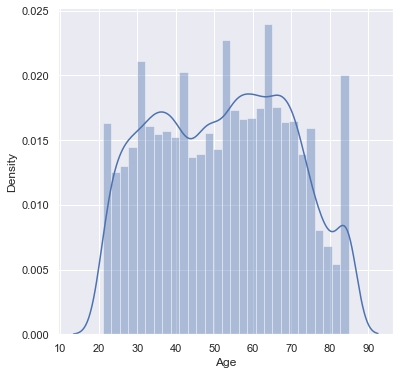

In [11]:
#distribution of age value column(what age group predominant in our data)
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df_healthcare["Age"])
plt.show()
#this density plot shows us that we have more sample of group beloning to age 19-22

In [12]:
px.violin(df_healthcare, x = 'Family_Size',y = 'Total_Expenditure')
# here we can see not there is not a lot of coorelation between #of children and amoumt of children

In [13]:
df_healthcare["Family_Size"].value_counts()#574 samples out of data have no children

2     5727
1     3751
3     2802
4     2407
5     1279
6      468
7      195
8       79
9       32
10      22
16       2
12       1
Name: Family_Size, dtype: int64

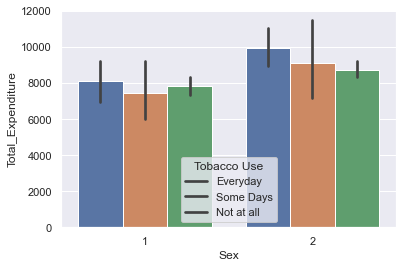

In [14]:
# 1=EVERY DAY / 2=SOME DAYS / 3=NOT AT ALL
totexp_tbc_plot = sns.barplot(data=df_healthcare,x='Sex', y='Total_Expenditure', hue="Tobacco_Use")

plt.legend(title='Tobacco Use', loc='lower center', labels=['Everyday', 'Some Days', 'Not at all'])

### NEED TO FIX LENGEND COLORS
plt.show(totexp_tbc_plot)

In [15]:
px.histogram(df_healthcare, x='Sex', y='Total_Expenditure', color='Region')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#Data pre-processing
#encoding the categorical features
# sex 0 or 1
label = LabelEncoder()
label.fit(df_healthcare.sex.drop_duplicates())
df_healthcare.sex = label.transform(df_healthcare.sex)
# smoker or not
label.fit(df_healthcare.smoker.drop_duplicates())
df_healthcare.smoker = label.transform(df_healthcare.smoker)
#region, each hregion has a number
label.fit(df_healthcare.region.drop_duplicates())
df_healthcare.region = label.transform(df_healthcare.region)

df_healthcare

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [12]:
df_healthcare.charges.corr(df_healthcare.age)

0.2990081933306477

In [13]:
df_healthcare.charges.corr(df_healthcare.bmi)

0.19834096883362887

In [14]:
df_healthcare.children.corr(df_healthcare.charges)

0.06799822684790482

In [99]:
df_healthcare.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


Here's how correlation coefficients can be interpreted

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

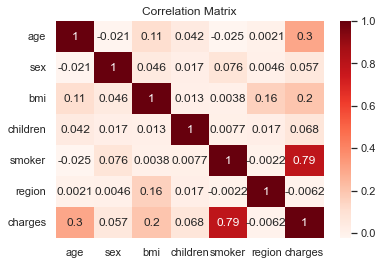

In [100]:
sns.heatmap(df_healthcare.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

We now know that the "smoker" and "age" columns have the strongest correlation with "charges".

## Linear Regression using Scikit-learn for Non Smokers

Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [18]:
non_smoker_df = df_healthcare[df_healthcare.smoker == 0]

In [19]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


In [77]:
non_smoker_df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

Next, let's visualize the relationship between "age" and "charges"

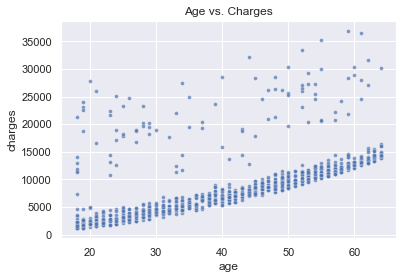

In [20]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. 

In [21]:
model = LinearRegression()

In [22]:
#create X and Y data matrices
X = non_smoker_df.drop(columns=["charges", "smoker"], axis=1)
y = non_smoker_df.charges
print('X.shape :', X.shape)
print('y.shape :', y.shape)


X.shape : (1064, 5)
y.shape : (1064,)


In [23]:
#Perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Data dimention
X_train.shape, y_train.shape

((851, 5), (851,))

In [25]:
X_test.shape, y_test.shape

((213, 5), (213,))

In [26]:
from sklearn import linear_model
#Compute performance of the model
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
#Build Linear regression
model = LinearRegression()

In [28]:
#build training model
model.fit(X_train, y_train)

LinearRegression()

In [47]:
#Apply trained model to make prediction (on test set)
y_pred = model.predict(X_test)

In [55]:
### Prediction results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 261.32258445 -559.68661848   34.00110718  593.67231827 -473.07213624]
Intercept: -2547.6131084208773
Mean squared error (MSE): 19019486.27
Coefficient of determination (R^2): 0.46


In [56]:
#String Formatting
r2_score(y_test, y_pred)

0.4582642851515557

In [57]:
y_test

41       4949.75870
1326     7050.02130
521      3994.17780
930      2927.06470
991      7144.86265
           ...     
723      1263.24900
74       7726.85400
163      5152.13400
1258    30063.58055
32       4687.79700
Name: charges, Length: 213, dtype: float64

In [58]:
np.array(y_test)

array([ 4949.7587 ,  7050.0213 ,  3994.1778 ,  2927.0647 ,  7144.86265,
        1727.54   , 11264.541  ,  3484.331  , 11381.3254 ,  3857.75925,
        5125.2157 , 10795.93733,  1720.3537 , 12913.9924 ,  9411.005  ,
       12479.70895,  5257.50795, 11363.2832 ,  1252.407  ,  2680.9493 ,
        7986.47525,  5080.096  , 12323.936  ,  7173.35995,  5693.4305 ,
        1646.4297 ,  3167.45585, 13352.0998 ,  6360.9936 , 26140.3603 ,
        1728.897  , 24227.33724,  6548.19505, 14418.2804 ,  4915.05985,
       11566.30055, 10422.91665,  4234.927  , 14382.70905,  3490.5491 ,
        5584.3057 ,  4544.2348 ,  8944.1151 ,  7160.094  ,  1682.597  ,
       11881.9696 ,  6198.7518 ,  9880.068  ,  4415.1588 ,  3176.2877 ,
        6686.4313 ,  2904.088  , 16455.70785,  8302.53565, 12244.531  ,
        1702.4553 ,  3766.8838 ,  2221.56445, 11165.41765,  1906.35825,
       10564.8845 ,  4074.4537 ,  1628.4709 ,  2755.02095, 23241.47453,
        7623.518  , 11454.0215 ,  5926.846  ,  2775.19215,  9549

In [59]:
y_pred

array([ 7040.04792957,  9545.55183152,  6372.09428094,  4916.6870316 ,
        9516.41055562,  2440.87381166, 12349.0383179 ,  4261.0419368 ,
       12771.360217  ,  6043.48457523,  6980.03762718,  3179.22690497,
        2265.08808756, 13770.07326286, 11758.80617479, 13708.34851274,
        7067.21530246, 12330.02584586,  1377.04352706,  3814.81489646,
       10216.36040963,  5787.53652861, 13150.56010313,  9304.94342624,
        7278.33133194,  2592.81657945,  4105.56210055, 13642.34161043,
        8843.98453928, 10353.07944384,  1630.72018095, 13087.93891917,
        8580.51979172, 14596.35708096,  6111.45689616, 13180.2629203 ,
       11821.33644459,  5109.36279057, 15086.023749  ,  5385.45575933,
        7712.17179758,  6512.41231335, 11240.72043428,  8853.61668489,
        2565.62445582, 13091.12277089,  8102.81532473, 11297.33834173,
        6333.72118145,  4529.54656366,  8630.20089138,  3881.57659374,
       16508.92045782, 10330.85313296, 13121.11407447,  2326.51056434,
      

<AxesSubplot:xlabel='charges'>

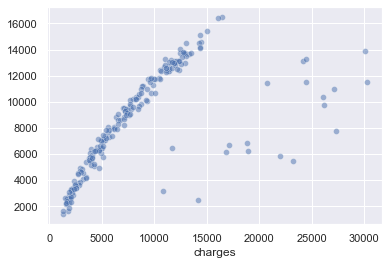

In [60]:
#Making the scatter plot
sns.scatterplot(y_test, y_pred, alpha=0.5)

In [63]:
#Testing prediction
data = {"age":20, "sex":1, "bmi":20, "children":5, "region": 2}
index=[0]
cust_df=pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,region
0,20,1,20,5,2


In [64]:
cost_prediction= model.predict(cust_df)
print("The medical insurance cost fo the new customer is: ", cost_prediction)

The medical insurance cost fo the new customer is:  [4821.39142459]


## Playing with different Regression models

# Linear Regression 

In [95]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [96]:
x = df_healthcare.drop(['charges'], axis = 1)
y = df_healthcare['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824424
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.799874714544996


# Ridge Regression

In [97]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495807
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063138


# Lasso Regression

In [85]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039544
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


# Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df_healthcare.drop(['charges'], axis=1)
y = df_healthcare.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3628893.887, MSE test data: 19730453.910


TypeError: r2_score() takes 2 positional arguments but 3 were given

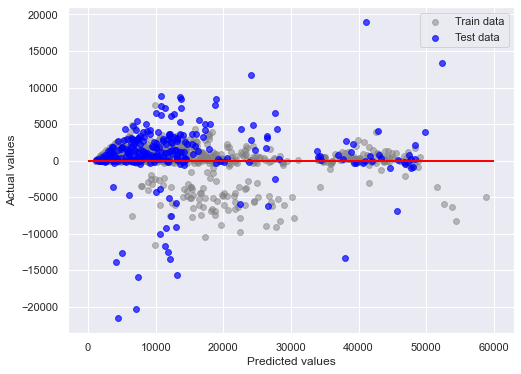

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')


Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

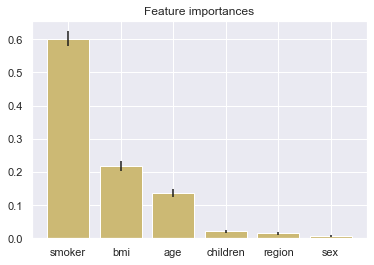

In [93]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")